In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.io.fits as pyfits
from astropy.nddata import CCDData
from astropy.visualization import hist
from ccdproc import CCDData
from ccdproc import ccd_process
from astropy.table import Table, hstack, vstack, join
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.io import fits
from matplotlib import cm
import astropy.units as u
import astropy.constants as c
import os
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
file1 = 'GALAH_DR3_main_allstar_v2.fits'
data1 = pyfits.getdata(file1)

filename = 'GALAH_DR3_main_allstar_v2.fits'
fits_file = fits.open(filename)
allstar = fits_file[1].data
fits_file.close()

filename = 'GALAH_DR3_VAC_ages_v2.fits'
fits_file = fits.open(filename)
ages = fits_file[1].data
fits_file.close()

filename = 'GALAH_DR3_VAC_dynamics_v2.fits'
fits_file = fits.open(filename)
dyn = fits_file[1].data
fits_file.close()

files = join(allstar, dyn, keys = 'sobject_id')

data = join(files, ages, keys = 'sobject_id')

t = Table.read('simulation_data_220118.fits')

In [4]:
t = Table.read('simulation_data_220118.fits')

In [64]:
t['R'] = np.sqrt(t['x']**2+t['y']**2)

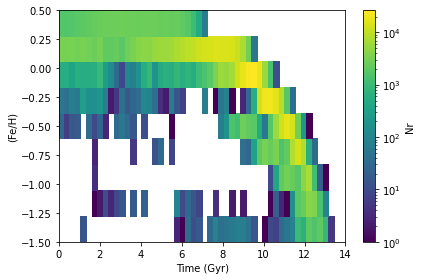

In [5]:
# with paper's x and y range

def figure_8(e1):
    p, x, y, s = plt.hist2d(
        13.8-t['tform'],
        (t[e1+'_H']),
        bins = (np.linspace(0, 14, 53), np.linspace(-1.5, 0.5, 10)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
    c = plt.colorbar(s)
    c.set_label('Nr')
    plt.xlabel('Time (Gyr)')
    plt.ylabel('('+e1+'/H)')
    #plt.title(''+element+ ' production over time')
    plt.tight_layout()
    plt.figsize=(15, 20)
   # plt.axvline(0, color='grey')
    #plt.axhline(0, color = 'grey')
    plt.savefig(''+e1+' over time with linear.png', dpi=200,bbox_inches='tight')
    #plt.axes().set_aspect('equal')
    

    
figure_8('Fe')

Bins based on: "The 1272 templates include 12 values of total metallciity [M/H] from -2.27 to 0.40 dex, 53 values of age between 0.03 and 14 Gyr, and two values of [Mg/Fe], of 0 and 0.4 dex"- assuming not accurate because it doesn't say they are evenly spaced. 

Confused by: bins being weighted according to area of bin?? (page 9) or each bin is weighted by its stellar mass

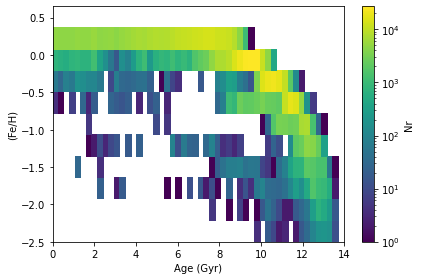

In [6]:
# with more fitting x and y range

def figure_8(e1):
    p, x, y, s = plt.hist2d(
        13.8-t['tform'],
        (t[e1+'_H']),
        bins = (np.linspace(0, 14, 53), np.linspace(-2.5, 0.65, 12)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
    c = plt.colorbar(s)
    c.set_label('Nr')
    plt.xlabel('Age (Gyr)')
    plt.ylabel('('+e1+'/H)')
    #plt.title(''+element+ ' production over time')
    plt.tight_layout()
    plt.figsize=(15, 20)
   # plt.axvline(0, color='grey')
    #plt.axhline(0, color = 'grey')
    plt.savefig(''+e1+' over time with linear.png', dpi=200,bbox_inches='tight')
    #plt.axes().set_aspect('equal')
    

    
figure_8('Fe')

# Bins based on: " The 1272 templates include 12 values of total  
# metallciity [M/H] from -2.27 to 0.40 dex, 53 values of age
# between 0.03 and 14 Gyr, and two values of [Mg/Fe], of
# 0 and 0.4 dex"

In [7]:
R = np.sqrt(t['x']**2+t['y']**2)

In [8]:
# Cut of accreted stars at [M/H]<0

M_sim = t['Fe_H']

acc_sim = (
M_sim < 0
)

M_obs = data['fe_h']

acc_obs = (
M_obs < 0)

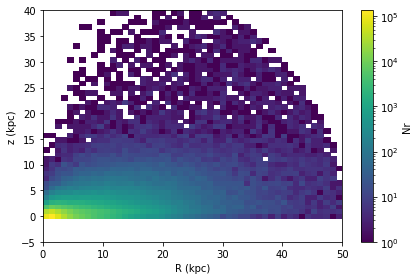

In [9]:
p, x, y, s = plt.hist2d(
        (R),#[acc_sim]),
        np.abs(t['z']),#[acc_sim]),
        bins = (np.linspace(0, 50, 50), np.linspace(-5, 40, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.tight_layout()
plt.figsize=(15, 20)

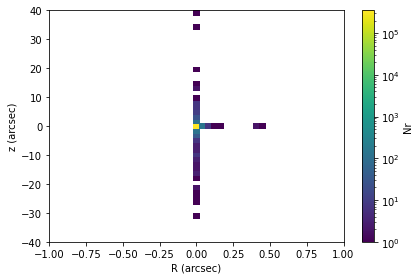

In [10]:
# Trying to convert kpc to arcsec
p, x, y, s = plt.hist2d(
        ((1/(R*1000))[acc_sim]),
        (1/((t['z'])*1000)[acc_sim]),
        bins = (np.linspace(-1, 1, 50), np.linspace(-40, 40, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('R (arcsec)')
plt.ylabel('z (arcsec)')
plt.tight_layout()
plt.figsize=(15, 20)

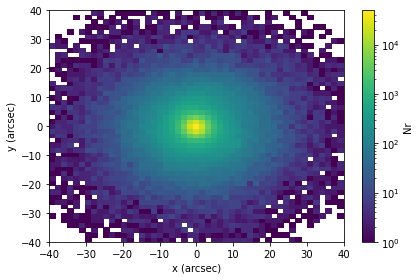

In [11]:
# WRONG UNITS ON X AND Y 
p, x, y, s = plt.hist2d(
        (t['x'][acc_sim]),
        (t['y'][acc_sim]),
        bins = (np.linspace(-40, 40, 50), np.linspace(-40, 40, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('x (arcsec)')
plt.ylabel('y (arcsec)')
#plt.title(''+element+ ' production over time')
plt.tight_layout()
plt.figsize=(15, 20)

# GALAH data

In [12]:
data

star_id,sobject_id,dr2_source_id,dr3_source_id,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,e_teff,irfm_teff,irfm_ebv,irfm_ebv_ref,logg,e_logg,fe_h,e_fe_h,flag_fe_h,fe_h_atmo,vmic,vbroad,e_vbroad,chi2_sp,alpha_fe,e_alpha_fe,nr_alpha_fe,flag_alpha_fe,flux_A_Fe,chi_A_Fe,Li_fe,e_Li_fe,nr_Li_fe,flag_Li_fe,C_fe,e_C_fe,nr_C_fe,flag_C_fe,O_fe,e_O_fe,nr_O_fe,flag_O_fe,Na_fe,e_Na_fe,nr_Na_fe,flag_Na_fe,Mg_fe,e_Mg_fe,nr_Mg_fe,flag_Mg_fe,Al_fe,e_Al_fe,nr_Al_fe,flag_Al_fe,Si_fe,e_Si_fe,nr_Si_fe,flag_Si_fe,K_fe,e_K_fe,nr_K_fe,flag_K_fe,Ca_fe,e_Ca_fe,nr_Ca_fe,flag_Ca_fe,Sc_fe,e_Sc_fe,nr_Sc_fe,flag_Sc_fe,Sc2_fe,e_Sc2_fe,nr_Sc2_fe,flag_Sc2_fe,Ti_fe,e_Ti_fe,nr_Ti_fe,flag_Ti_fe,Ti2_fe,e_Ti2_fe,nr_Ti2_fe,flag_Ti2_fe,V_fe,e_V_fe,nr_V_fe,flag_V_fe,Cr_fe,e_Cr_fe,nr_Cr_fe,flag_Cr_fe,Cr2_fe,e_Cr2_fe,nr_Cr2_fe,flag_Cr2_fe,Mn_fe,e_Mn_fe,nr_Mn_fe,flag_Mn_fe,Co_fe,e_Co_fe,nr_Co_fe,flag_Co_fe,Ni_fe,e_Ni_fe,nr_Ni_fe,flag_Ni_fe,Cu_fe,e_Cu_fe,nr_Cu_fe,flag_Cu_fe,Zn_fe,e_Zn_fe,nr_Zn_fe,flag_Zn_fe,Rb_fe,e_Rb_fe,nr_Rb_fe,flag_Rb_fe,Sr_fe,e_Sr_fe,nr_Sr_fe,flag_Sr_fe,Y_fe,e_Y_fe,nr_Y_fe,flag_Y_fe,Zr_fe,e_Zr_fe,nr_Zr_fe,flag_Zr_fe,Mo_fe,e_Mo_fe,nr_Mo_fe,flag_Mo_fe,Ru_fe,e_Ru_fe,nr_Ru_fe,flag_Ru_fe,Ba_fe,e_Ba_fe,nr_Ba_fe,flag_Ba_fe,La_fe,e_La_fe,nr_La_fe,flag_La_fe,Ce_fe,e_Ce_fe,nr_Ce_fe,flag_Ce_fe,Nd_fe,e_Nd_fe,nr_Nd_fe,flag_Nd_fe,Sm_fe,e_Sm_fe,nr_Sm_fe,flag_Sm_fe,Eu_fe,e_Eu_fe,nr_Eu_fe,flag_Eu_fe,ra_dr2,dec_dr2,parallax_dr2,parallax_error_dr2,r_est_dr2,r_lo_dr2,r_hi_dr2,r_len_dr2,rv_galah,e_rv_galah,rv_gaia_dr2,e_rv_gaia_dr2,red_flag,ebv,snr_c1_iraf,snr_c2_iraf,snr_c3_iraf,snr_c4_iraf,flag_guess,v_jk,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual_tmass,w2mpro,w2mpro_error,ph_qual_wise,a_ks,e_a_ks,bc_ks,ruwe_dr2,use_dist_flag,use_rv_flag,X_XYZ,Y_XYZ,Z_XYZ,U_UVW,V_UVW,W_UVW,R_Rzphi,phi_Rzphi,z_Rzphi,vR_Rzphi,vT_Rzphi,vz_Rzphi,J_R,L_Z,J_Z,omega_R,omega_phi,omega_z,angle_R,angle_phi,angle_z,ecc,zmax,R_peri,R_ap,Energy,X_XYZ_5,X_XYZ_50,X_XYZ_95,Y_XYZ_5,Y_XYZ_50,Y_XYZ_95,Z_XYZ_5,Z_XYZ_50,Z_XYZ_95,U_UVW_5,U_UVW_50,U_UVW_95,V_UVW_5,V_UVW_50,V_UVW_95,W_UVW_5,W_UVW_50,W_UVW_95,R_Rzphi_5,R_Rzphi_50,R_Rzphi_95,phi_Rzphi_5,phi_Rzphi_50,phi_Rzphi_95,z_Rzphi_5,z_Rzphi_50,z_Rzphi_95,vR_Rzphi_5,vR_Rzphi_50,vR_Rzphi_95,vT_Rzphi_5,vT_Rzphi_50,vT_Rzphi_95,vz_Rzphi_5,vz_Rzphi_50,vz_Rzphi_95,J_R_5,J_R_50,J_R_95,L_Z_5,L_Z_50,L_Z_95,J_Z_5,J_Z_50,J_Z_95,omega_R_5,omega_R_50,omega_R_95,omega_phi_5,omega_phi_50,omega_phi_95,omega_z_5,omega_z_50,omega_z_95,angle_R_5,angle_R_50,angle_R_95,angle_phi_5,angle_phi_50,angle_phi_95,angle_z_5,angle_z_50,angle_z_95,ecc_5,ecc_50,ecc_95,zmax_5,zmax_50,zmax_95,R_peri_5,R_peri_50,R_peri_95,R_ap_5,R_ap_50,R_ap_95,Energy_5,Energy_50,Energy_95,age_bstep,e_age_bstep,e16_age_bstep,e50_age_bstep,e84_age_bstep,m_act_bstep,e_m_act_bstep,e16_m_act_bstep,e50_m_act_bstep,e84_m_act_bstep,m_ini_bstep,e_m_ini_bstep,e16_m_ini_bstep,e50_m_ini_bstep,e84_m_ini_bstep,radius_bstep,e_radius_bstep,e16_radius_bstep,e50_radius_bstep,e84_radius_bstep,is_redclump_bstep,e_is_redclump_bstep,e16_is_redclump_bstep,e50_is_redclump_bstep,e84_is_redclump_bstep,distance_bstep,e_distance_bstep,e16_distance_bstep,e50_distance_bstep,e84_distance_bstep,ebv_bstep,e_ebv_bstep,e16_ebv_bstep,e50_ebv_bstep,e84_ebv_bstep,teff_bstep,e_teff_bstep,e16_teff_bstep,e50_teff_bstep,e84_teff_bstep,logg_bstep,e_logg_bstep,e16_logg_bstep,e50_logg_bstep,e84_logg_bstep,meh_act_bstep,e_meh_act_bstep,e16_meh_act_bstep,e50_meh_act_bstep,e84_meh_act_bstep,meh_ini_bstep,e_meh_ini_bstep,e16_meh_ini_bstep,e50_meh_ini_bstep,e84_meh_ini_bstep,log_lum_bstep,e_log_lum_bstep,e16_log_lum_bstep,e50_log_lum_bstep,e84_log_lum_bstep,abs_j_bstep,e_abs_j_bstep,e16_abs_j_bstep,e50_abs_j_bstep,e84_abs_j_bstep,abs_ks_bstep,e_abs_ks_bstep,e16_abs_ks_bstep,e50_abs_ks_bstep,e84_abs_ks_bstep
str16,int64,int64,int64,str12,int64,int64,str6,str4,int64,float32,float64,float32,float32,str3,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float64,float64,float64,int64,float32,float32

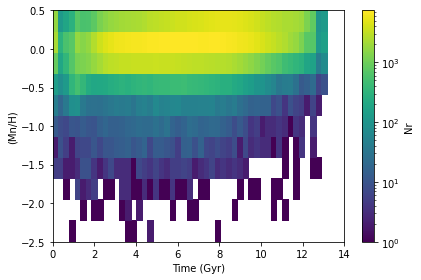

In [13]:
def figure_8(e1):
    p, x, y, s = plt.hist2d(
        data['age_bstep'],
        (data[e1+'_fe']-data['fe_h']),
        bins = (np.linspace(0, 14, 53), np.linspace(-2.5, 0.5, 12)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
    c = plt.colorbar(s)
    c.set_label('Nr')
    plt.xlabel('Time (Gyr)')
    plt.ylabel('('+e1+'/H)')
    #plt.title(''+element+ ' production over time')
    plt.tight_layout()
    plt.figsize=(15, 20)
   # plt.axvline(0, color='grey')
    #plt.axhline(0, color = 'grey')
    plt.savefig(''+e1+' over time with linear.png', dpi=200,bbox_inches='tight')
    #plt.axes().set_aspect('equal')
    

    
figure_8('Mn')

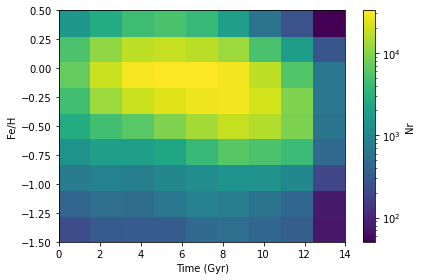

In [14]:
p, x, y, s = plt.hist2d(
        data['age_bstep'],
        (data['fe_h']),
        bins = (np.linspace(0, 14, 10), np.linspace(-1.5, 0.5, 10)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('Time (Gyr)')
plt.ylabel('Fe/H')
#plt.title(''+element+ ' production over time')
plt.tight_layout()
plt.figsize=(15, 20)
# plt.axvline(0, color='grey')
#plt.axhline(0, color = 'grey')
plt.savefig('OBS: Fe over time.png', dpi=200,bbox_inches='tight')
#plt.axes().set_aspect('equal')

In [15]:
#data

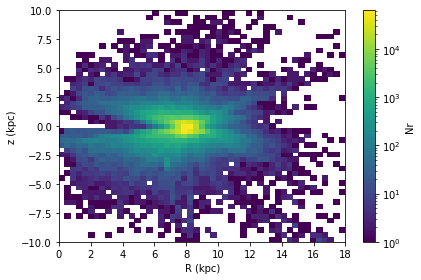

In [16]:
p, x, y, s = plt.hist2d(
        (data['R_Rzphi']),#[acc_obs]),
        (data['z_Rzphi']),#[acc_obs]),
        bins = (np.linspace(-0, 18, 50), np.linspace(-10, 10, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
#plt.title(''+element+ ' production over time')
plt.tight_layout()
plt.figsize=(15, 20)

Trying to convert the values in kpc to values of arcsec so that we could directly relate this to figure 16, which is in the same units. 

Using 1/pc = arcsec, and kpc*1000=pc

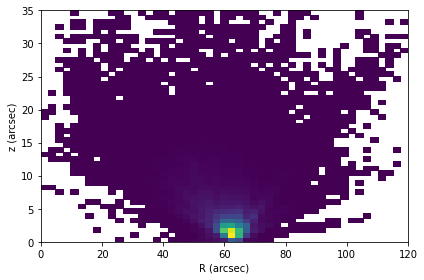

In [17]:
#converting kpc to arcsec
# R = 1/(data['R_Rzphi']*1000)
# z = 1/(data['z_Rzphi']*1000)

M_obs = data['fe_h']
M_obs_err = M_obs[~np.isnan(M_obs)]
acc_obs = (
M_obs < 0)

R_1 = (data['R_Rzphi'])/0.128
z_1 = (data['z_Rzphi'])/0.128

R = R_1[~np.isnan(R_1)]
z = z_1[~np.isnan(z_1)]

r = R_1[acc_obs]
Z = z_1[acc_obs]

rr = r[~np.isnan(r)]
zz = Z[~np.isnan(Z)]


p, x, y, s = plt.hist2d(
        (rr),
        (zz),
        bins = (np.linspace(0, 120, 50), np.linspace(0, 35, 50)),
        cmin = 1,
        #norm = colors.LogNorm()
    );
    
    
# c = plt.colorbar(s)
# c.set_label('Nr')
plt.xlabel('R (arcsec)')
plt.ylabel('z (arcsec)')
plt.tight_layout()
plt.figsize=(15, 20)


## only accreted stars

This will be required to do the colorbar that is seen in Figure 16. Basically, working out an array of the ratio of accreted stars to total stars in a particular area. 

In [18]:
R_bins = np.linspace(0,20,10)
z_bins = np.linspace(0,3,10)
accretion_rate = []

for R in R_bins:
    for z in z_bins:
        nr_in_bins = len(np.where((
            (R > R-0.1) & (R < R+0.1) & 
            (t['z'] > z-0.015) & (t['z'] < z+0.015)
        ) == True)[0])
        
        nr_in_bins_and_accreted = len(np.where((
            (R > R-0.1) & (R < R+0.1) & 
            (t['z'] > z-0.015) & (t['z'] < z+0.015) &
            (t['Fe_H'] < -1)
        ) == True)[0])
   
        #print(nr_in_bins_and_accreted / nr_in_bins)
        
        #accretion_rate.append(nr_in_bins_and_accreted / nr_in_bins)
        
        accretion_rate.append(nr_in_bins_and_accreted / nr_in_bins)
        


# R vs z

### Simulations

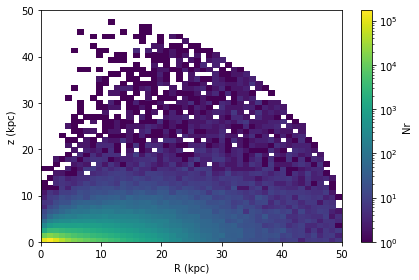

In [65]:
p, x, y, s = plt.hist2d(
        t['R'],#[acc_sim]),
        np.abs(t['z']),#[acc_sim]),
        bins = (np.linspace(0, 50, 50), np.linspace(0, 50, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.tight_layout()
plt.figsize=(15, 20)

In [22]:
t['R'] = np.sqrt(t['x']**2+t['y']**2)

Text(0, 0.5, 'z / kpc')

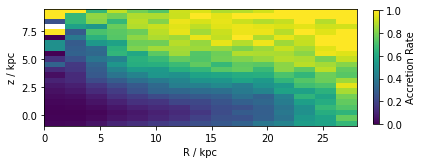

In [23]:
R_bin_size = 2 # kpc
z_bin_size = 0.5 # kpc

R_bins = np.arange(0,30,R_bin_size)
z_bins = np.arange(-1,10,z_bin_size)

accretion_rate = np.ones((len(R_bins),len(z_bins)))

for R_index,R_bin in enumerate(R_bins):
    for z_index,z_bin in enumerate(z_bins):
        nr_in_bins = len(np.where((
            (t['R'] > R_bin-0.5*R_bin_size) & (t['R'] < R_bin+0.5*R_bin_size) & 
            (t['z'] > z_bin-0.5*z_bin_size) & (t['z'] < z_bin+0.5*z_bin_size)
        ) == True)[0])
        
        nr_in_bins_and_accreted = len(np.where((
            (t['R'] > R_bin-0.5*R_bin_size) & (t['R'] < R_bin+0.5*R_bin_size) & 
            (t['z'] > z_bin-0.5*z_bin_size) & (t['z'] < z_bin+0.5*z_bin_size) &
            (
                (t['Fe_H'] < -0.4) &
                (t['Fe_H'] < 0.3*t['tform']-1.55) &
                (t['Fe_H'] < 0.6*t['tform']-2.1)
            )
        ) == True)[0])
        try:
            accretion_rate[R_index,len(z_bins)-z_index-1] = nr_in_bins_and_accreted / nr_in_bins
        except:
            accretion_rate[R_index,len(z_bins)-z_index-1] = np.NaN

s = plt.imshow(accretion_rate.T,extent=(R_bins[0],R_bins[-1],z_bins[0],z_bins[-1]), aspect=1)
c = plt.colorbar(s, fraction=0.017)
c.set_label('Accretion Rate')
plt.xlabel('R / kpc')
plt.ylabel('z / kpc')

# GALAH Data
### Fe/H over time 
First plotting metallicity over time to determine a rough cut-off of accreted stars

In [99]:
#data

Text(0, 0.5, '[Fe/H]')

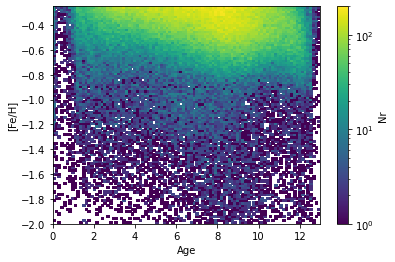

In [94]:
qual = (
        (data['flag_sp'] == 0) &
        (data['flag_fe_h'] == 0)
    )

p, x, y, s = plt.hist2d(
        data['age_bstep'][qual],
        data['fe_h'][qual],
        bins = (np.linspace(0,13,100),np.linspace(-2.0,-0.25,100)),
        cmin = 1,
        norm = colors.LogNorm()
    );

c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')

#plt.clim(10**0, 10**1)

Approximating accreted stars as having Fe/H abundances between -1 and 0 (for now, based on Martig et al) 

Text(0, 0.5, 'z / kpc')

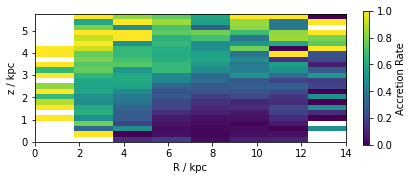

In [98]:
R_bin_size_obs = 2 # kpc
z_bin_size_obs = 0.25 # kpc

R_bins_obs = np.arange(0,15,R_bin_size_obs)
z_bins_obs = np.arange(0,6,z_bin_size_obs)

accretion_rate_obs = np.ones((len(R_bins_obs),len(z_bins_obs)))

for R_index_obs,R_bin_obs in enumerate(R_bins_obs):
    for z_index_obs,z_bin_obs in enumerate(z_bins_obs):
        nr_in_bins_obs = len(np.where((
            (data['R_Rzphi'] > R_bin_obs-0.5*R_bin_size_obs) & (data['R_Rzphi'] < R_bin_obs+0.5*R_bin_size_obs) & 
            (data['z_Rzphi'] > z_bin_obs-0.5*z_bin_size_obs) & (data['z_Rzphi'] < z_bin_obs+0.5*z_bin_size_obs)
        ) == True)[0])
        
        nr_in_bins_and_accreted_obs = len(np.where((
            (data['R_Rzphi'] > R_bin_obs-0.5*R_bin_size_obs) & (data['R_Rzphi'] < R_bin_obs+0.5*R_bin_size_obs) & 
            (data['z_Rzphi'] > z_bin_obs-0.5*z_bin_size_obs) & (data['z_Rzphi'] < z_bin_obs+0.5*z_bin_size_obs) &
            (
                (data['fe_h'] < -0.8) 
                #(data['fe_h'] > -1)
#                 (data['fe_h'] < 0.3*t['tform']-1.55) &
#                 (data['fe_h'] < 0.6*t['tform']-2.1)
            )
        ) == True)[0])
        try:
            accretion_rate_obs[R_index_obs,len(z_bins_obs)-z_index_obs-1] = nr_in_bins_and_accreted_obs / nr_in_bins_obs
        except:
            accretion_rate_obs[R_index_obs,len(z_bins_obs)-z_index_obs-1] = np.NaN

s = plt.imshow(accretion_rate_obs.T,extent=(R_bins_obs[0],R_bins_obs[-1],z_bins_obs[0],z_bins_obs[-1]), aspect=1)
c = plt.colorbar(s, fraction=0.02)
c.set_label('Accretion Rate')
plt.xlabel('R / kpc')
plt.ylabel('z / kpc')

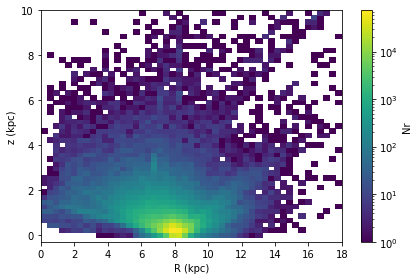

In [28]:
p, x, y, s = plt.hist2d(
        (data['R_Rzphi']),#[acc_obs]),
        np.abs(data['z_Rzphi']),#[acc_obs]),
        bins = (np.linspace(-0, 18, 50), np.linspace(-0.3, 10, 50)),
        cmin = 1,
        norm = colors.LogNorm()
    );
    
    
c = plt.colorbar(s)
c.set_label('Nr')
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
#plt.title(''+element+ ' production over time')
plt.tight_layout()
plt.figsize=(15, 20)

## Subplots!

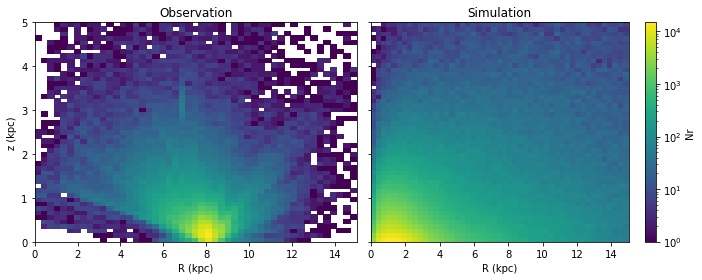

In [89]:
f, gs = plt.subplots(1, 2,figsize=(10,4),sharex=True,sharey=True)


ax = gs[0]
p, x, y, s = ax.hist2d(
    (data['R_Rzphi']),#[acc_obs]),
    np.abs(data['z_Rzphi']),#[acc_obs]),
    bins = (np.linspace(0, 15, 50), np.linspace(0, 5, 50)),
    cmin = 1,
    norm = colors.LogNorm()
);
ax.set_title('Observation')
ax.set_ylabel('z (kpc)')
ax.set_xlabel('R (kpc)')


ax = gs[1]
p, x, y, s = ax.hist2d(
    t['R'],#[acc_sim]),
    np.abs(t['z']),#[acc_sim]),
    bins = (np.linspace(0, 15, 50), np.linspace(0, 5, 50)),
    cmin = 1,
    norm = colors.LogNorm()
);
ax.set_title('Simulation')
ax.set_xlabel('R (kpc)')


c = plt.colorbar(s, ax=ax)
c.set_label('Nr')
# ax.set_xlabel('R (kpc)')
# ax.set_ylabel('z (kpc)')
plt.tight_layout()

In [ ]:
#### FINISH PUTTING THE BINS/PLOTS ONTO SUBPLOTS!
#### KEEP WORKING ON FINDING SEPARATION IN TIME PLOT

Comparative subplots of observation vs simulation, fraction of accreted stars over all stars

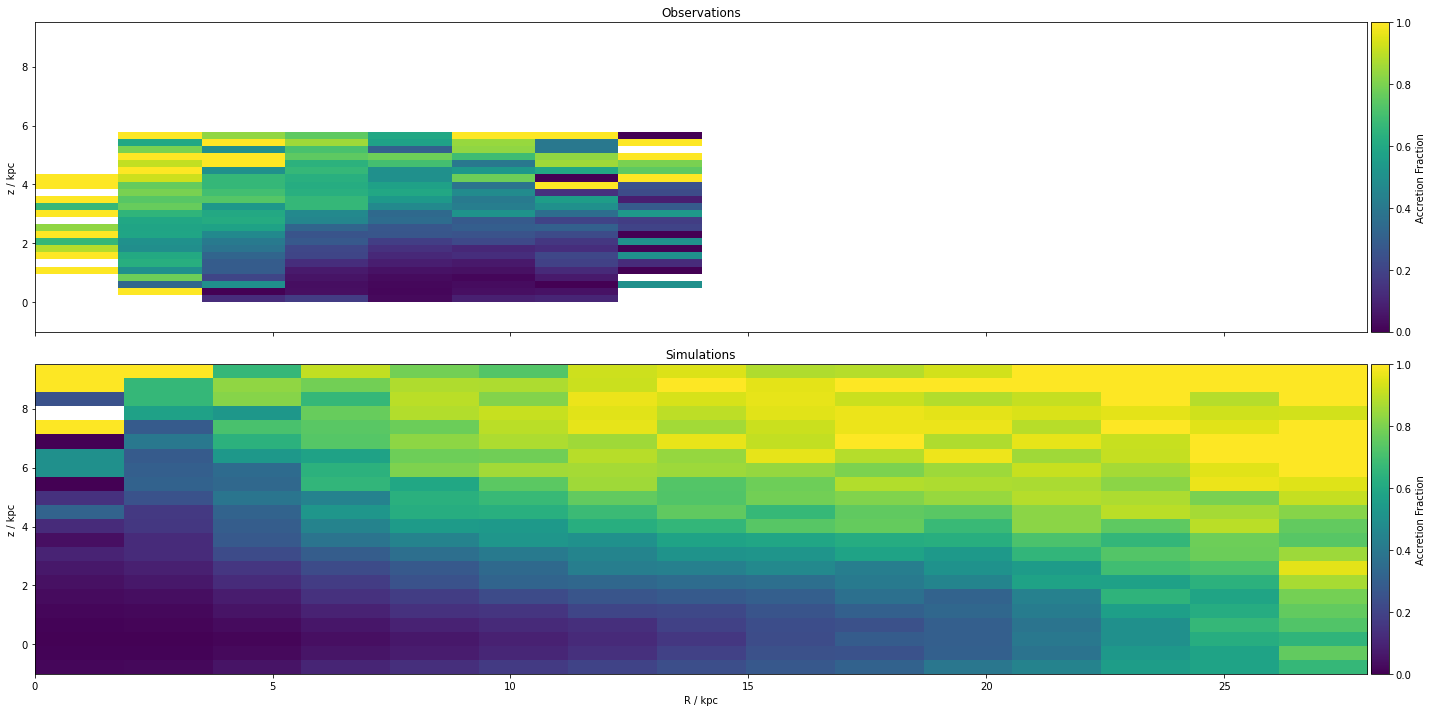

In [105]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))

ax1.set_title('Observations')
im1 = ax1.imshow(accretion_rate_obs.T,extent=(R_bins_obs[0],R_bins_obs[-1],z_bins_obs[0],z_bins_obs[-1]), aspect="auto")
div1 = make_axes_locatable(ax1)
cax1 = div1.append_axes("right", size = 0.25, pad=0.05)
cbar1 = plt.colorbar(im1, cax=cax1, fraction=0.25)
cbar1.set_label('Accretion Fraction')

ax1.set_ylabel('z / kpc')



#s = plt.imshow()
#c = plt.colorbar(s, fraction=0.1)
ax2.set_title('Simulations')
im2 = ax2.imshow(accretion_rate.T,extent=(R_bins[0],R_bins[-1],z_bins[0],z_bins[-1]), aspect="auto")
div2 = make_axes_locatable(ax2)
cax2 = div2.append_axes("right", size = 0.25, pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2,fraction=0.25)
cbar2.set_label('Accretion Fraction')
ax2.set_ylabel('z / kpc')
ax2.set_xlabel('R / kpc')

fig.tight_layout()

# CHANGE TITLES